In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [58]:
df = pd.read_csv('Data/BTC-USD.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,3683.047119,3769.917969,3682.286621,3769.697021,3769.697021,9776191466
2022-01-02,3769.298340,3836.161865,3727.357422,3829.564941,3829.564941,9881471548
2022-01-03,3829.535645,3836.198730,3698.047607,3761.380371,3761.380371,12080777893
2022-01-04,3761.361572,3876.785156,3723.349854,3794.056641,3794.056641,14030925983
2022-01-05,3794.269043,3842.059814,3456.745361,3550.386963,3550.386963,18061338502


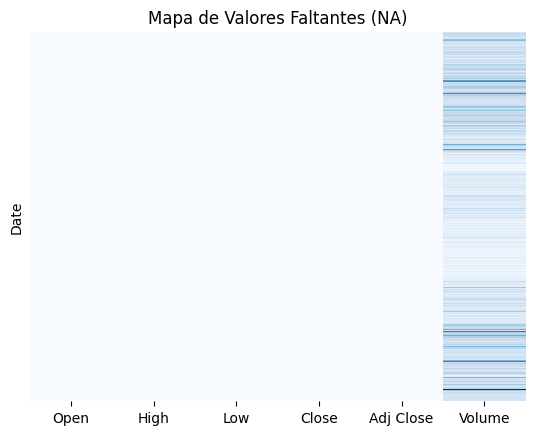

In [59]:
sns.heatmap(df, cmap='Blues', cbar=False, yticklabels=False)
plt.title('Mapa de Valores Faltantes (NA)')
plt.show()

In [60]:
def graficar_predicciones(real, prediccion):
    #is same dim?
    min_len = min(len(real), len(prediccion))
    real = real[:min_len]
    prediccion = prediccion[:min_len]

    # Mask for remove NaN and Inf(no NaN ni Inf)
    mask = ~np.isnan(prediccion) & ~np.isinf(prediccion) & ~np.isnan(real) & ~np.isinf(real)


    real = real[mask]
    prediccion = prediccion[mask]

    plt.plot(real, color='red', label='Valor real de la acción')
    plt.plot(prediccion, color='blue', label='Predicción de la acción')


    plt.ylim(0.9 * np.min(prediccion), 1.1 * np.max(prediccion))

    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la acción')
    plt.legend()
    plt.show()

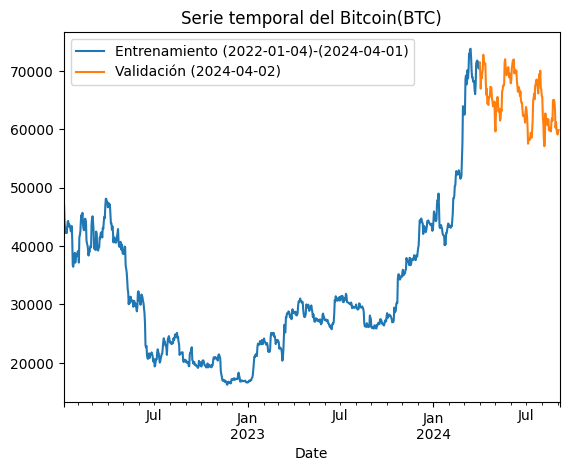

In [56]:
set_entrenamiento = df[:'2024-04-01'].iloc[:,1:2]
set_validacion = df['2024-04-01':].iloc[:,1:2]

set_entrenamiento['High'].plot(legend=True)
set_validacion['High'].plot(legend=True)
plt.legend(['Entrenamiento (2022-01-04)-(2024-04-01)', 'Validación (2024-04-02)'])
plt.title("Serie temporal del Bitcoin(BTC)")
plt.show()

In [7]:
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

In [13]:
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

In [14]:
for i in range(time_step,m):
    # X: Block of timestep
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: Next data 
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [23]:
# Reshape X_train para que se ajuste al modelo en Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(759, 60, 1)

In [30]:
# Neural Network LSTM

dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

In [32]:
print(dim_entrada, dim_salida)

(60, 1) 1


In [33]:
    modelo = Sequential()
    modelo.add(LSTM(units=na, input_shape=dim_entrada))
    modelo.add(Dense(units=dim_salida))
    modelo.compile(optimizer='rmsprop', loss='mse')
    modelo.fit(X_train,Y_train,epochs=20,batch_size=32)

Epoch 1/20


/home/ilich/UN/PricePredictionModel/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0483
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0031
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0017
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0019
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0018
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0013
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.4205e-04
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.9626e-04
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.8517e-04
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.8057e-04
Epoch 15/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.1776

In [37]:
# Validation
x_test = set_validacion.values
x_test = sc.transform(x_test)

/home/ilich/UN/PricePredictionModel/env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [39]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [41]:
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


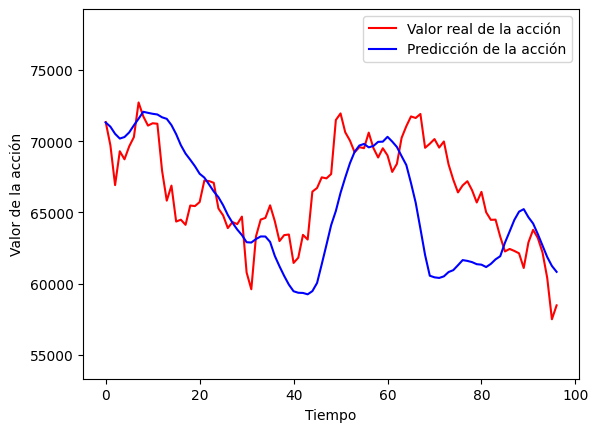

In [57]:
graficar_predicciones1(set_validacion.values,prediccion)